In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-index/AI_index_db.csv


In [32]:
df = pd.read_csv("/kaggle/input/ai-index/AI_index_db.csv")

In [3]:
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [4]:
import matplotlib.pyplot as plt

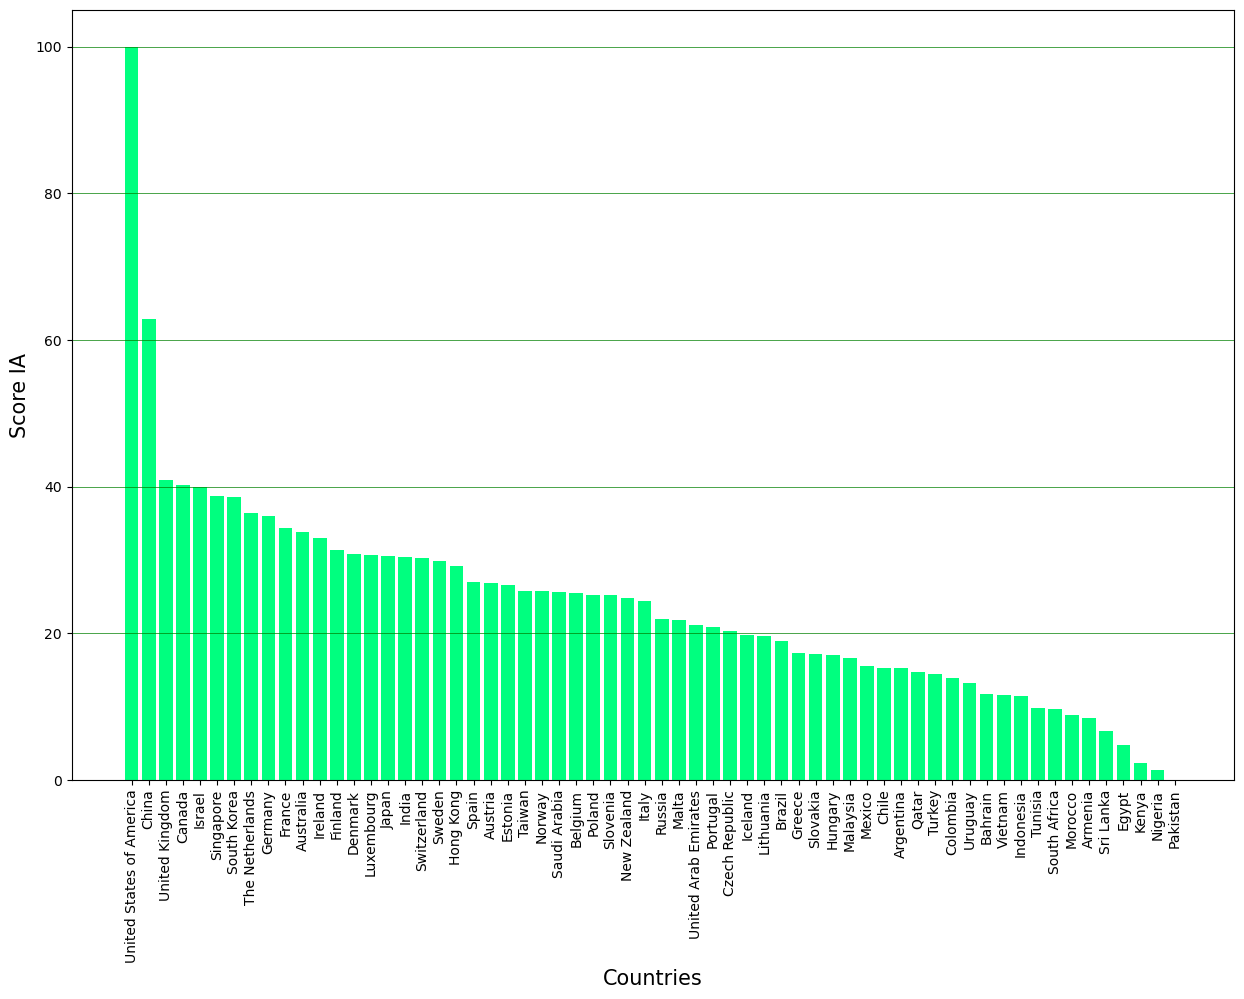

In [5]:
plt.figure(figsize=(15, 10))
plt.bar(x=df['Country'], height=df['Total score'], color='springgreen')
plt.xticks(rotation=90)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Score IA', fontsize=15)
plt.grid(color='g', linestyle='-', linewidth=0.5, axis='y')
plt.show()

In [62]:
df_country = df.groupby(df['Region'] == 'Americas', group_keys=False).apply(lambda x: x)
df_country

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy


In [85]:
df_americas = df[['Country', 'Total score']].where(df['Region'] == 'Americas')
df_americas.dropna(inplace=True)

<BarContainer object of 8 artists>

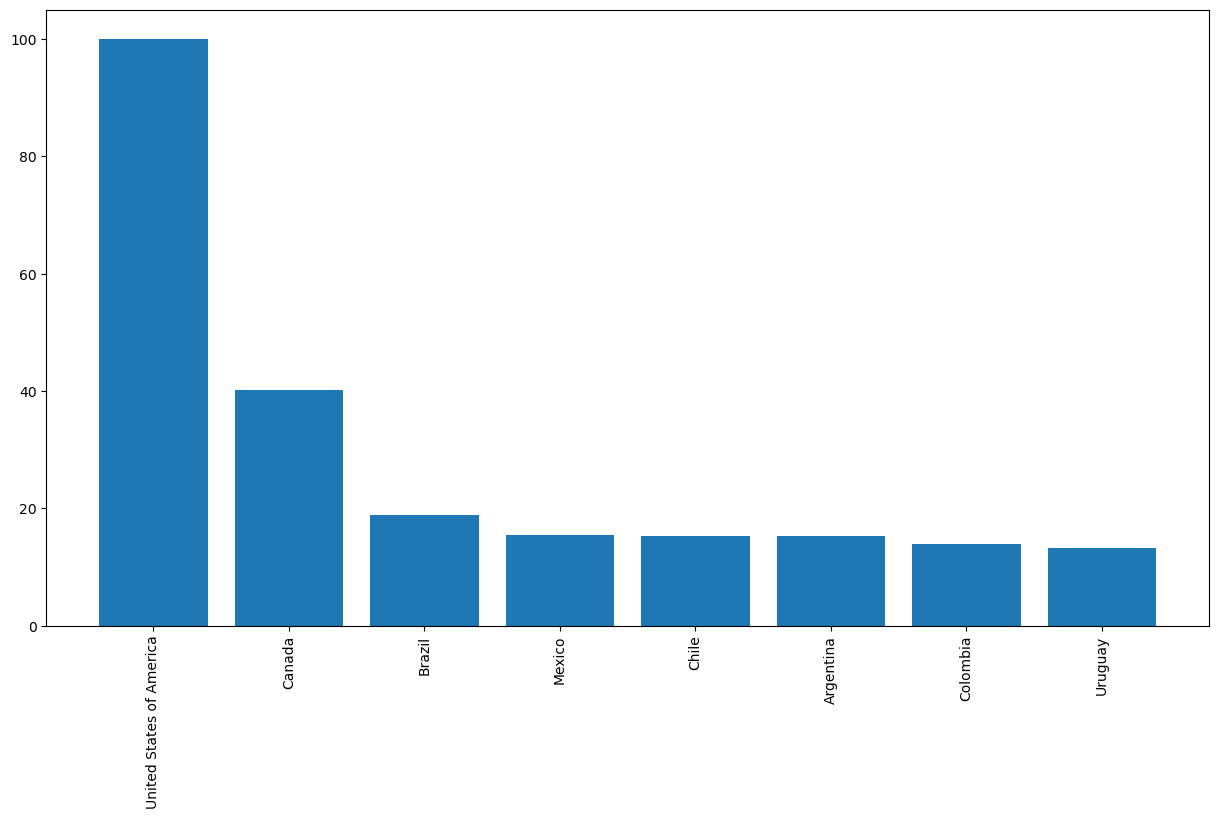

In [104]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.xticks(rotation=90)
ax.bar(x=df_americas['Country'], height=df_americas['Total score'])

In [6]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

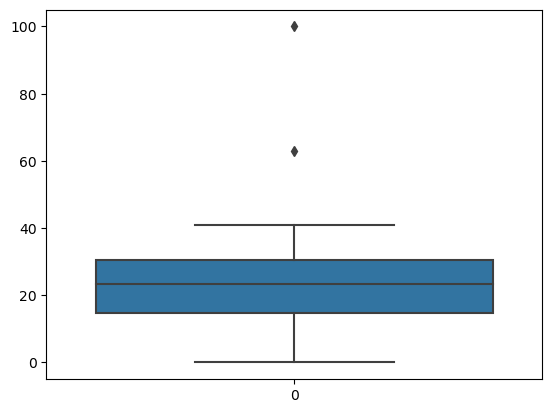

In [7]:
sns.boxplot(df['Total score'])

In [8]:
np.where(df['Total score']>50)

(array([0, 1]),)

In [9]:
df.isnull().sum()

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [10]:
df.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
df = df.drop(['Country', 'Region',], axis=1)

In [12]:
df.head(5)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Cluster,Income group,Political regime
0,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Power players,High,Liberal democracy
1,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Power players,Upper middle,Closed autocracy
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Traditional champions,High,Liberal democracy
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Traditional champions,High,Liberal democracy
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Rising stars,High,Liberal democracy


In [13]:
X = df.drop('Total score', axis=1).values
y = df['Total score'].values

In [14]:
X

array([[100.0, 94.02, 64.56, 100.0, 100.0, 77.39, 100.0, 'Power players',
        'High', 'Liberal democracy'],
       [16.51, 100.0, 91.57, 71.42, 79.97, 94.87, 44.02, 'Power players',
        'Upper middle', 'Closed autocracy'],
       [39.65, 71.43, 74.65, 36.5, 25.03, 82.82, 18.91,
        'Traditional champions', 'High', 'Liberal democracy'],
       [31.28, 77.05, 93.94, 30.67, 25.78, 100.0, 14.88,
        'Traditional champions', 'High', 'Liberal democracy'],
       [35.76, 67.58, 82.44, 32.63, 27.96, 43.91, 27.33, 'Rising stars',
        'High', 'Liberal democracy'],
       [39.38, 84.3, 43.15, 37.67, 22.55, 79.82, 15.07, 'Rising stars',
        'High', 'Electoral democracy'],
       [14.54, 85.23, 68.86, 26.66, 77.25, 87.5, 5.41, 'Rising stars',
        'High', 'Liberal democracy'],
       [33.83, 81.99, 88.05, 25.54, 30.17, 62.35, 4.97, 'Rising stars',
        'High', 'Liberal democracy'],
       [27.63, 77.22, 70.22, 35.84, 24.79, 84.65, 8.29,
        'Traditional champions',

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

X[:, 7] = label.fit_transform(X[:, 7])
X[:, 8] = label.fit_transform(X[:, 8])
X[:, 9] = label.fit_transform(X[:, 9])

In [17]:
X[0]

array([100.0, 94.02, 64.56, 100.0, 100.0, 77.39, 100.0, 1, 0, 3],
      dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [20]:
y_train.shape

(49,)

In [21]:
X_train.shape

(49, 10)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parametros = {'n_estimators': [100, 200, 400, 40, 80, 20],
             'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"]}

In [25]:
# grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parametros)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

In [26]:
Regressor = RandomForestRegressor(criterion="squared_error", n_estimators=40)
Regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40)

In [27]:
predictions = Regressor.score(X_test, y_test)
predictions

0.935169149345828

In [28]:
import pickle

In [110]:
pickle.dump(Regressor, open("Regressor_AI_Index.sav", "wb"))